CUSTOMER SEGMENTATION USING K-MEANS CLUSTERING - AMRUTH SAI MUDIVARTHI

1. Importing Libraries and Dataset

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [62]:
rawdata=pd.read_csv("C:/Users/M Amruth Sai/Downloads/Mall_Customers.csv")
rawdata.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


2. Preprocessing the Data

In [63]:
columns=rawdata.columns[1:]
data=rawdata[columns]
data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [64]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['Gender'] = encoder.fit_transform(data['Gender'])


C:\Users\M Amruth Sai\AppData\Local\Temp\ipykernel_23368\243370050.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Gender'] = encoder.fit_transform(data['Gender'])


In [65]:
features = data[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
features

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

3. Applying K-Means Algorithm Using Elbow Method

In [67]:
from sklearn.cluster import KMeans
wcss = [] 
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

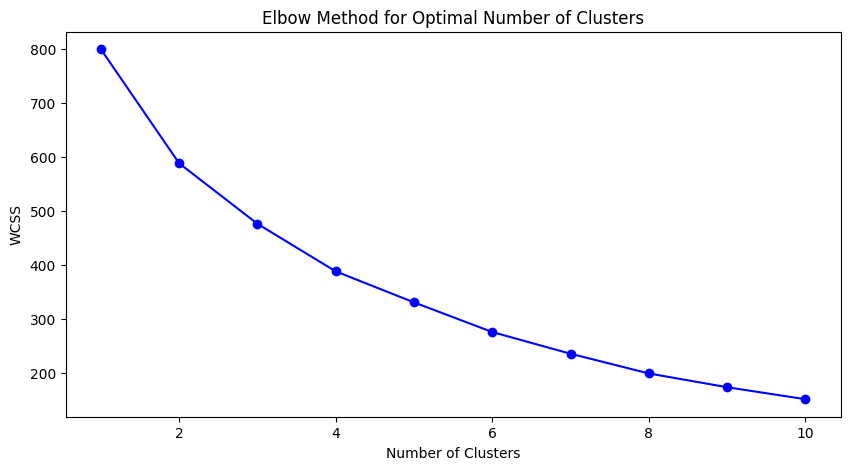

In [68]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [69]:
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

4. Principle Component Analysis

In [70]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
data['PCA1'] = principal_components[:, 0]
data['PCA2'] = principal_components[:, 1]

5. Visualization

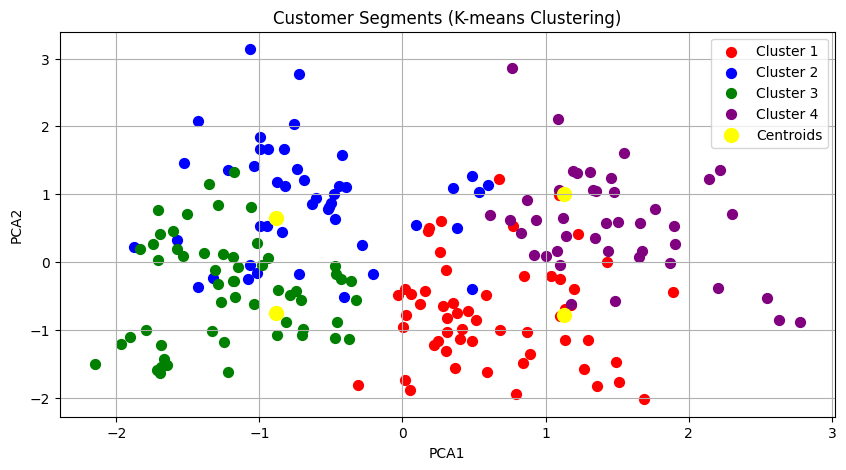

In [71]:
plt.figure(figsize=(10, 5))
plt.scatter(data[data['Cluster'] == 0]['PCA1'], data[data['Cluster'] == 0]['PCA2'], s=50, c='red', label='Cluster 1')
plt.scatter(data[data['Cluster'] == 1]['PCA1'], data[data['Cluster'] == 1]['PCA2'], s=50, c='blue', label='Cluster 2')
plt.scatter(data[data['Cluster'] == 2]['PCA1'], data[data['Cluster'] == 2]['PCA2'], s=50, c='green', label='Cluster 3')
plt.scatter(data[data['Cluster'] == 3]['PCA1'], data[data['Cluster'] == 3]['PCA2'], s=50, c='purple', label='Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow', label='Centroids')
plt.title('Customer Segments (K-means Clustering)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.grid()
plt.show()

In [72]:
print(data)

     Gender  Age  Annual Income (k$)  Spending Score (1-100)  Cluster  \
0         1   19                  15                      39        1   
1         1   21                  15                      81        1   
2         0   20                  16                       6        0   
3         0   23                  16                      77        2   
4         0   31                  17                      40        0   
..      ...  ...                 ...                     ...      ...   
195       0   35                 120                      79        2   
196       0   45                 126                      28        0   
197       1   32                 126                      74        1   
198       1   32                 137                      18        3   
199       1   30                 137                      83        1   

         PCA1      PCA2  
0   -0.406383 -0.520714  
1   -1.427673 -0.367310  
2    0.050761 -1.894068  
3   -1.694513 -1.63

In [73]:
# Evaluate the quality of clusters using silhouette score
silhouette_avg = silhouette_score(scaled_features, data['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.2983972818544038


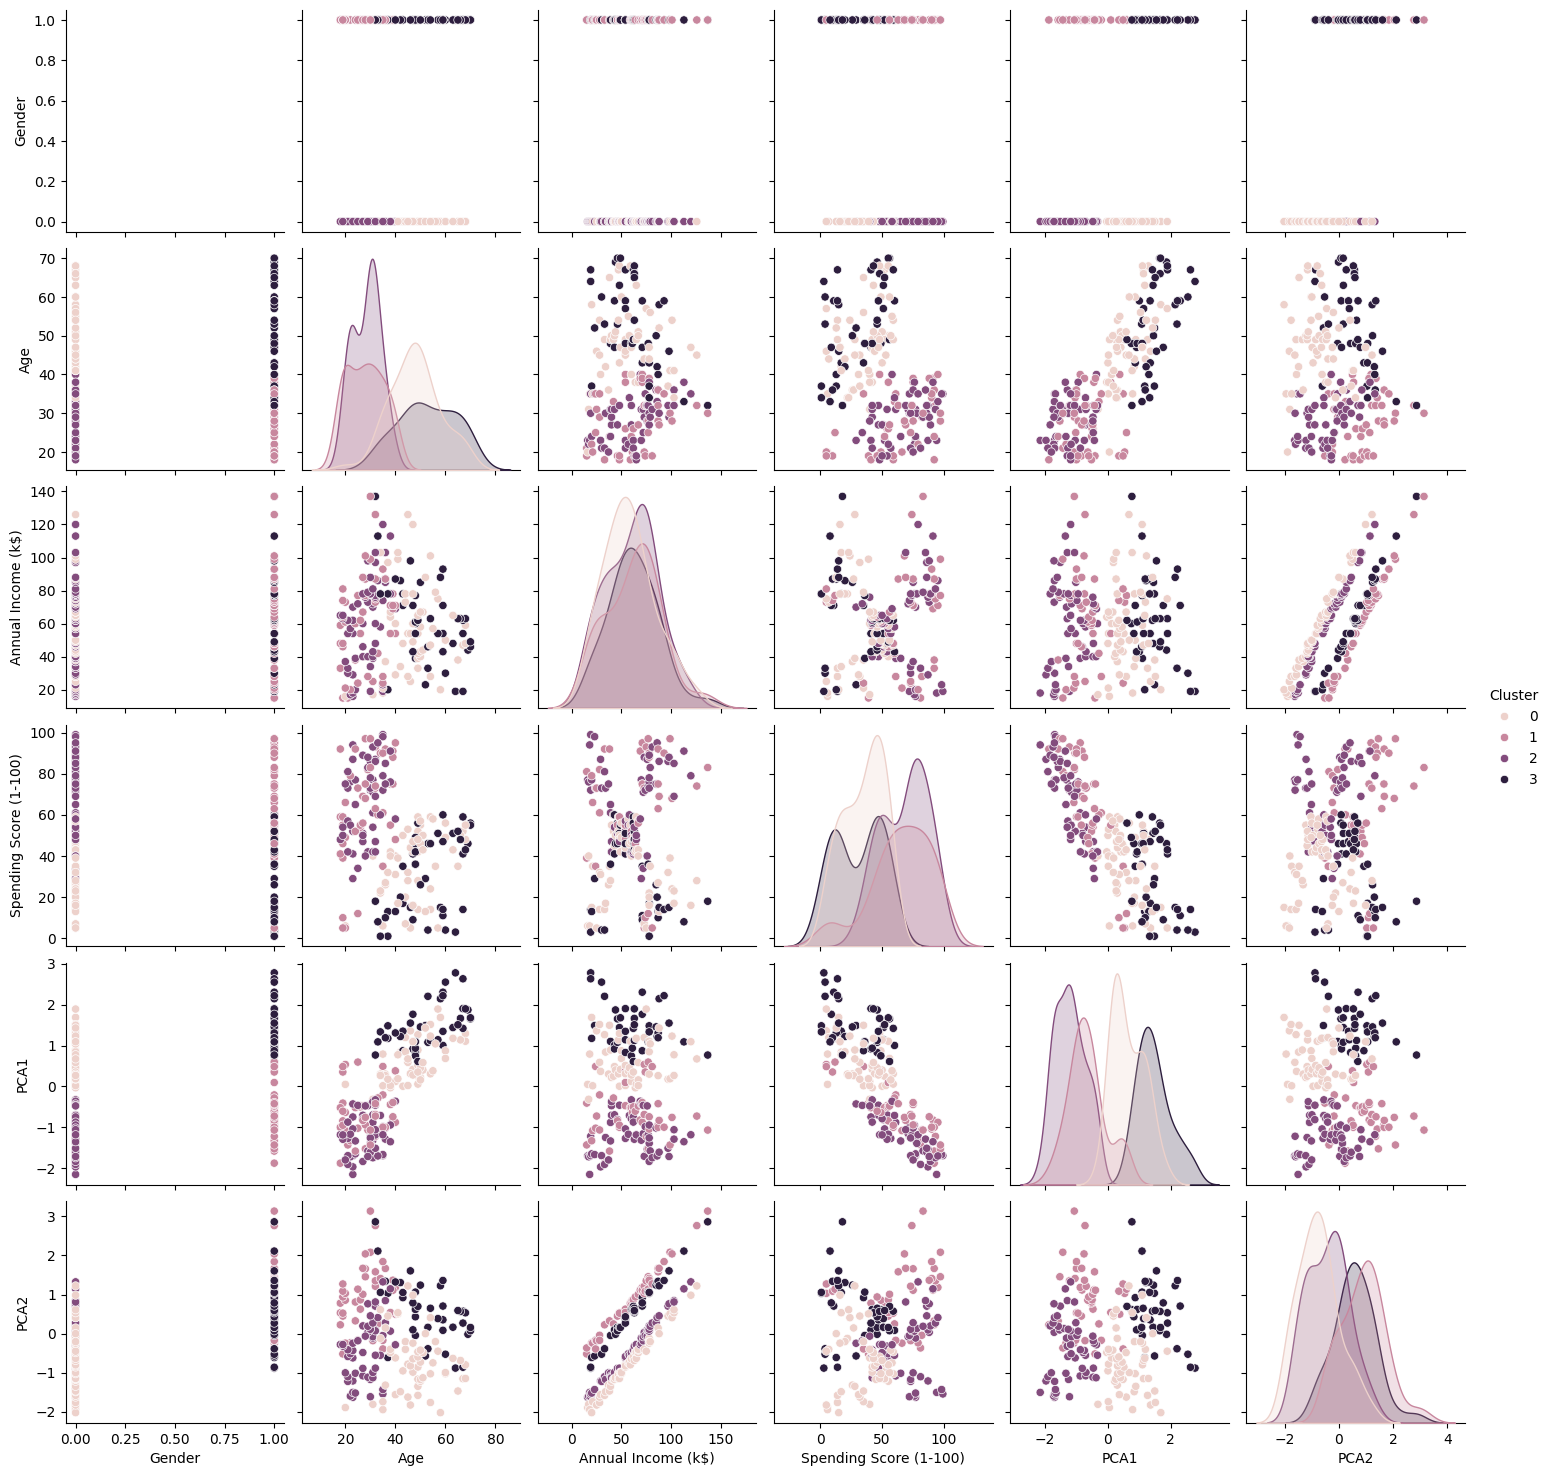

In [74]:
# Visualization of clusters using PCA components with seaborn pairplot
sns.pairplot(data, hue='Cluster')
plt.show()